**Análisis de varios préstamos**

*Hemos visto como calcular cuadros de amortización para préstamos, siguiendo una serie de condiciones, pero la ventaja que nos ofrece Python, es el manejo de un volumen elevado de datos, su rápido cálculo, y su análisis*

*Imaginemos que queremos comparar 1.000.000 de tipos de interés, no es algo habitual, pero con esto lo que pretendemos es mostrar la potencia de la herramienta, y ver cómo actúa*

*vamos a ver un ejemplo*

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf
import numpy as np
import pandas as pd

In [3]:
rate = np.arange(0,10000,0.01)

pago = []
total = []
total_inter = []



a = npf.pmt(rate=rate, nper=10, pv=-100000, fv=0, when='end')
pago.extend(a)  #Observese que aquí utilizamos extend, para lograr que nuestra lista pago tenga 100 elementos, de manera que luego podamos construir un Dataframe


for i in pago:
    b = i*10
    total.append(b)
    
for i in total:
    c = i-100000
    total_inter.append(c)


In [4]:
Prestamos = pd.DataFrame(
   ...:     {
   ...:         "Interés": rate,
   ...:         "Pago mensual": pago,
   ...:         "Total pagado": total,
   ...:         "Total intereses pagados":total_inter,
   ...:         
   ...:     }
   ...: )
   ...: 

In [5]:
round(Prestamos, 2)

,Interés,Pago mensual,Total pagado,Total intereses pagados
0,0.00,1.000000e+04,1.000000e+05,0.000000e+00
1,0.01,1.055821e+04,1.055821e+05,5.582080e+03
2,0.02,1.113265e+04,1.113265e+05,1.132653e+04
3,0.03,1.172305e+04,1.172305e+05,1.723051e+04
4,0.04,1.232909e+04,1.232909e+05,2.329094e+04
...,...,...,...,...
999995,9999.95,9.999950e+08,9.999950e+09,9.999850e+09
999996,9999.96,9.999960e+08,9.999960e+09,9.999860e+09
999997,9999.97,9.999970e+08,9.999970e+09,9.999870e+09
999998,9999.98,9.999980e+08,9.999980e+09,9.999880e+09


*Realmente esta tabla no tiene mucho sentido, porque al calcular tantos datos las cifras disminuyen hasta el punto de ser ilegibles, pero nos muestra que en un tiempo muy pequeño, apenas segundos, ha calculado los pagos para 1.000.000 de tipos de interés distintos, el total que vamos a abonar, y el total de los intereses, mostrandonos un tabla, todo ello calculado para un préstamo francés, pero podríamos realizarlo con cualquier otro tipo de préstamo.*

*Vamos ahora a realizar menos calculos, nos vamos a quedar con 100, y ver cómo rápidamente podemos tomar una decisión*

*Creamos los valores para nuestro interés, desde 0% al 100%, con una variación de 0.01*

*Nuestro préstamo será de 100.000 euros, a devolver en 10 años, cuotas anuales, calculadas mediante préstamo francés, amortizables al final del periodo*

In [6]:
rate = np.arange(0,0.1,0.001)

pago = []
total = []
total_inter = []



a = npf.pmt(rate=rate, nper=10, pv=-100000, fv=0, when='end')
pago.extend(a)  #Observese que aquí utilizamos extend, para lograr que nuestra lista pago tenga 100 elementos, de manera que luego podamos construir un Dataframe


for i in pago:
    b = i*10
    total.append(b)
    
for i in total:
    c = i-100000
    total_inter.append(c)

In [7]:
Prestamos2 = pd.DataFrame(
   ...:     {
   ...:         "Interés": rate,
   ...:         "Pago mensual": pago,
   ...:         "Total pagado": total,
   ...:         "Total intereses pagados":total_inter,
   ...:         
   ...:     }
   ...: )
   ...: 

In [8]:
round(Prestamos2.describe(),2)

,Interés,Pago mensual,Total pagado,Total intereses pagados
count,100.00,100.00,100.00,100.00
mean,0.05,12981.42,129814.21,29814.21
std,0.03,1820.72,18207.16,18207.16
min,0.00,10000.00,100000.00,0.00
25%,0.02,11411.14,114111.36,14111.36
50%,0.05,12919.05,129190.49,29190.49
75%,0.07,14518.75,145187.54,45187.54
max,0.10,16204.69,162046.92,62046.92


*Para estos 100 cálculos que hemos realizado, sabemos que su media, evidentemente se encuentra en 5%, siendo su desviación estandar de 0.03*

*La cuota mínima que podemos realizar, en el caso de no pagar ningún tipo de interés, es de 10.000 euros anuales, y la cuota máxima sería de 16.204 euros anuales, en caso de pagar 10% de interés.*


*La duda que nos suele surgir a la hora de solicitar un préstamo siempre es el plazo de devolución, y cómo nos afecta a la hora de pagar más o menos intereses. Aquí tenemos un ejemplo, en este caso es un préstamo de 1.000.000 de euros, a un 5% que podemos devolver hasta en 35 años, mediante cuotas mensuales.*

In [28]:
t = int(input("Introduzca el tiempo que quiere estudiar: "))
pv = float(input("Introduzca el importe del prestamo: "))
rate = float(input("Introduzca el tipo de interés (8% = 0.08): "))
when = int(input("Introduzca 0 si amortiza al final, 1 si amortiza al principio: "))
m = 12


nper = np.arange(1,t+1,1)

pago = []
total = []
total_inter = []
porct_pago = [0]




a = npf.pmt(rate= rate/m, nper=nper*m, pv=-pv, fv=0, when=when)
b = a*nper*m
pago.extend(a)  #Observese que aquí utilizamos extend, para lograr que nuestra lista pago tenga 100 elementos, de manera que luego podamos construir un Dataframe
total.extend(b)
n = 1
    
for i in total:
    c = i-pv
    total_inter.append(c)
    
for i in pago:
    d =pago[n-1]
    e = pago[n]
    f = ((e-d)/d)*100
    porct_pago.append(f)
    n +=1
    if n == len(nper):
        break
        
portct_inter = [0]
l = 1
for i in total_inter:
    g = total_inter[l-1]
    h = total_inter[l]
    i = ((h-g)/h)*100
    portct_inter.append(i)
    l +=1
    if l == len(nper):
        break

Introduzca el tiempo que quiere estudiar: 35
Introduzca el importe del prestamo: 1000
Introduzca el tipo de interés (8% = 0.08): 0.05
Introduzca 0 si amortiza al final, 1 si amortiza al principio: 0


In [29]:
Prestamos3 = pd.DataFrame(
   ...:     {
   ...:         "Nº de cuotas": nper*12,
   ...:         "Cuota Mensual": pago,
   ...:         "Total pagado": total,
   ...:         "Total intereses pagados":total_inter,
   ...:         "Variación cuota %": porct_pago,
   ...:         "Variación inter %": portct_inter,
   ...:     }
   ...: )
   ...: 

In [30]:
round(Prestamos3.head(35),2)

,Nº de cuotas,Cuota Mensual,Total pagado,Total intereses pagados,Variación cuota %,Variación inter %
0,12,85.61,1027.29,27.29,0.00,0.00
1,24,43.87,1052.91,52.91,-48.75,48.43
2,36,29.97,1078.95,78.95,-31.68,32.98
3,48,23.03,1105.41,105.41,-23.16,25.10
4,60,18.87,1132.27,132.27,-18.06,20.31
5,72,16.10,1159.56,159.56,-14.66,17.10
6,84,14.13,1187.25,187.25,-12.24,14.79
7,96,12.66,1215.35,215.35,-10.43,13.05
8,108,11.52,1243.87,243.87,-9.03,11.69
9,120,10.61,1272.79,272.79,-7.91,10.60


*Si observamos los datos, vemos que si en vez de pagar nuestro préstamo en un año, lo pagamos en dos, nuestra cuota varia en un 17% (del primer año respecto al segundo), siendo de un 9%, bajando a 2% en el año 5, y por debajo 1% a partir del año 14.*

*Podemos verlo mejor en la siguiente gráfica*

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.close("all") #Cuando usamos pandas, y una gran cantidad de datos hay que poner este código porque de lo contrario sale una advertencia.

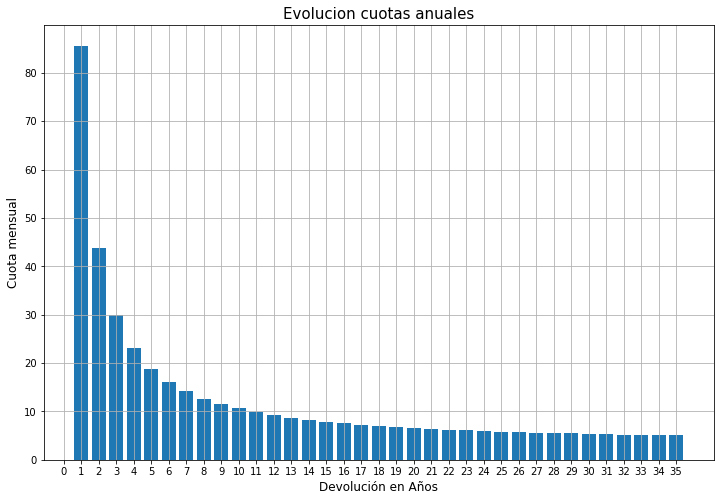

In [33]:
figure =plt.figure(figsize = (12,8))
plt.bar(nper, pago)
plt.grid()
plt.title("Evolucion cuotas anuales", fontsize = 15)
plt.xlabel("Devolución en Años", fontsize=12)
plt.ylabel("Cuota mensual", fontsize = 12)
plt.xticks(range(0,36,1))
plt.show()
plt.close(figure)

*Si vemos la gráfica de la cuota, esta disminuye radicalmente hasta el 5 año aproximadamente, a partir de ese momento, la cuota disminuye paulatinamente. Si tenemos que tomar una decisión, los 5 primeros años presentan grandes diferencias, a partir del décimo, la diferencias son mucho menores.*

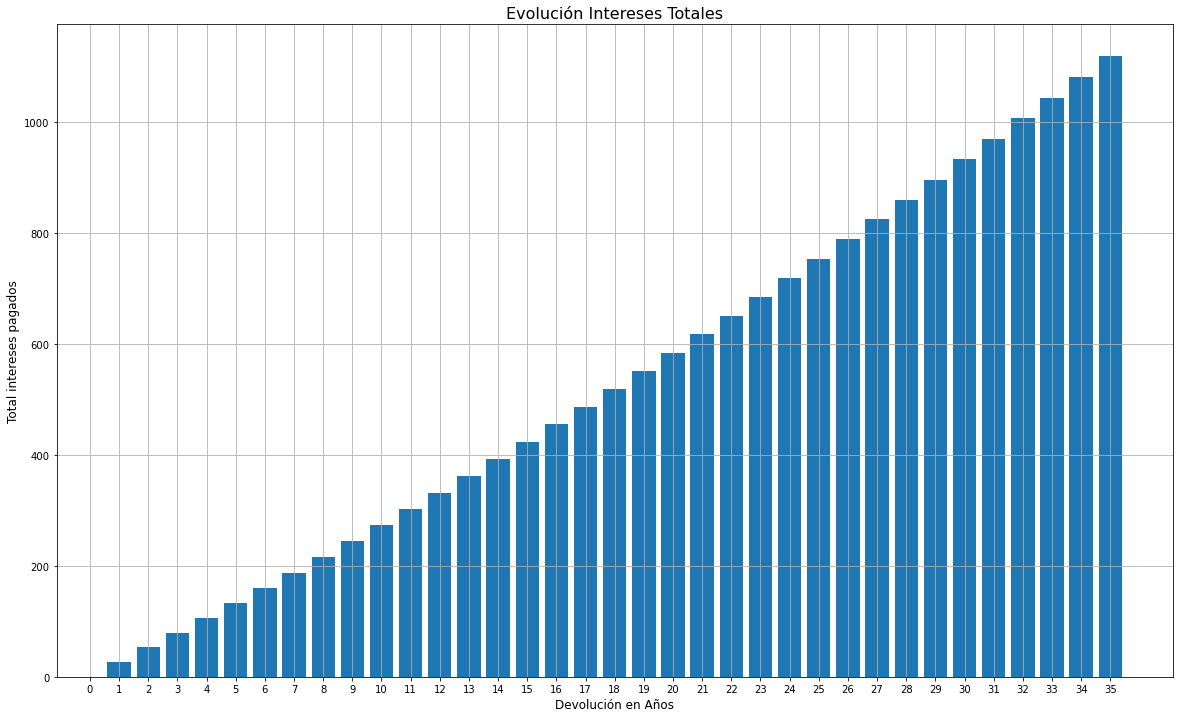

In [40]:
figure =plt.figure(figsize = (20,12))
plt.bar(nper, total_inter)
plt.grid()
plt.title("Evolución Intereses Totales", fontsize = 16)
plt.xlabel("Devolución en Años", fontsize=12)
plt.ylabel("Total intereses pagados", fontsize = 12)
plt.xticks(range(0,t+1,1))

plt.show()
plt.close(figure)

*Mediante la función describe, podemos obtener rápidamente los datos estadisticos resumidos de nuestro DataFrame*

In [39]:
round(Prestamos3.describe(),2)

,Nº de cuotas,Cuota Mensual,Total pagado,Total intereses pagados,Variación cuota %,Variación inter %
count,35.00,35.00,35.00,35.00,35.00,35.00
mean,216.00,12.28,1538.01,538.01,-7.11,9.45
std,122.96,15.09,330.29,330.29,9.96,9.56
min,12.00,5.05,1027.29,27.29,-48.75,0.00
25%,114.00,5.68,1258.33,258.33,-7.45,4.23
50%,216.00,7.03,1518.55,518.55,-3.24,5.89
75%,318.00,11.06,1806.54,806.54,-1.74,10.15
max,420.00,85.61,2119.69,1119.69,0.00,48.43


*Mediante esta función podemos crear un archivo de Excel con nuestros datos, que se guardará donde estemos trabajando con Python*

In [41]:
Prestamos3.to_excel("Prestamo.xlsx", sheet_name="Sheet1")